# 문제
Jake 마켓은 럭키백 이벤트를 오픈하고 나서 매출이 껑충 뛰었다.   
고객들은 수산물과 IT를 접목한 이 상품을 매우 좋아했다.   
이제 각지에서 Jake 마켓에 수산물을 공급하겠다고 아우성이다.   
   
영업 팀은 매주 7개의 생선 중에서 일부를 무작위로 골라 머신러닝 모델을 학습할 수 있게 훈련 데이터를 제공하고 있다.   
하지만 수산물을 공급하겠다는 곳이 너무 많아 샘플을 골라내는 일이 너무 힘들다.   
게다가 추가되는 수산물은 아직 샘플을 가지고 있지도 않다.   
영업 팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공하겠다고 약속했다.   
하지만 어느 생선이 먼저 올지도, 모든 생선이 도착할 때까지 기다릴 수도 없다.   
이제 어떻게 해야 할까?

# 점진적인 학습
Jake 마켓이 당면한 문제는 훈련 데이터가 한 번에 준비되는 것이 아니라 조금씩 전달된다는 것이다.   
도착하는 대로 생선을 판매해야 하므로 데이터가 쌓일 때까지 무작정 기다릴 수도 없다.   
그렇다면 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련하면 어떨까?   
   
꽤 괜찮은 아이디어이다.   
이렇게 하면 매일 추가되는 새로운 데이터를 활용해 모델을 훈련할 수 있다.   
한 가지 단점은 시간이 지날수록 데이터가 늘어나는 것이다.   
처음 며칠은 괜찮겠지만, 몇 달이 지나면 모델을 훈련하기 위한 서버를 늘려야 한다.   
확실히 이는 지속 가능한 방법은 아닌 것 같다.   
   
또 다른 방법은 새로운 데이터를 추가할 때, 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지하는 것이다.   
이렇게 하면 데이터셋의 크기가 너무 커지지 않을 수 있다.   
하지만 데이터를 버릴 때 다른 데이터에 없는 중요한 생선 데이터가 포함되어 있다면 큰일이다.   
앞으로 모델이 그 생선을 제대로 예측하지 못할 테니까 말이다.   
   
위에서 언급한 방법은 이전에 훈련한 모델을 버리고 다시 새로운 모델을 훈련하는 방식이다.   
**앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 수 없을까?**   
이렇게 할 수 있다면 훈련에 사용한 데이터를 모두 유지할 필요도 없고, 앞서 학습한 생선을 까먹을 일도 없을 것이다.   
   
이런 식의 훈련 방식을 **점진적 학습** 또는 온라인 학습이라고 부른다.   
대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법(Stochastic Gradient Descent)**이다.   
물론 사이킷런에서도 확률적 경사 하강법을 위한 클래스를 제공한다.

# 확률적 경사 하강법
확률적 경사 하강법에서 확률적이란 말은 `무작위하게` 혹은 `랜덤하게`의 기술적인 표현이다.   
그다음 `경사`는 `기울기`를 말한다.   
`하강법`은 `내려가는 방법`이다.   
다시 말해 경사 하강법은 경사를 따라 내려가는 방법을 말한다.   
   
예를 들어 산에서 내려온다고 생각해 본다.   
집으로 돌아가려면 등산로 입구까지 내려가야 한다.   
만약 어떤 산길도 장애물에 구애받지 않고 척척 내려갈 수 있다면 가장 빠른 길을 선택하는 것이 좋다.   
가장 빠른 길은 경사가 가장 가파른 길이다.   
   
위의 예시는 조금 과장되었지만, 실제로 산에서 내려올 때는 천천히 조금씩 내려와야 한다.   
장애물이란 변수가 많기 때문이다.   
경사 하강법도 마찬가지이다.   
가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다.   
이렇게 내려오는 과정이 바로 경사 하강법 모델을 훈련하는 것이다.   
   
그럼 이제 **확률적**이란 말을 이해할 차례이다.   
경사 하강법으로 내려올 때 가장 가파른 길을 찾는 방법은 무엇일까?   
훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾을 것이다.   
그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다.   
이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 **확률적 경사 하강법**이다.   
   
조금 더 자세히 설명하면 다음과 같다.   
확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다.   
그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다.   
이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다.   
   
이제 모든 샘플을 다 사용했다.   
그래도 산을 다 내려오지 못했으면 어떻게 할까?   
간단하다.   
다시 처음부터 시작하는 것이다.   
훈련 세트에 모든 샘플을 다시 채워 넣는다.   
그다음 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려간다.   
이렇게 만족할만한 위치에 도달할 때까지 계속 내려가면 된다.   
확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 **에포크(epoch)**라고 부른다.   
일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행한다.   
   
무작위로 샘플을 선택해 산에서 내려간다면 무책임해 보일 수 있다.   
그래서 아주 조금씩 내려가야 한다.   
그렇지 않으면 돌이킬 수 없는 길로 들어설지 모른다.   
하지만 걱정하는 것과는 달리 확률적 경사 하강법은 꽤 잘 동작한다.   
만약 그래도 걱정이 된다면 1개씩 말고 무작위로 몇 개의 샘플을 선택해서 경사를 따라 내려가면 어떨까?   
가능하다.   
이렇게 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식을 **미니배치 경사 하강법(minibatch gradient descent)**이라고 한다.   
실전에서 아주 많이 사용한다.   
   
극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있다.   
이를 **배치 경사 하강법(batch gradient descent)**이라고 부른다.   
사실 전체 데이터를 사용하기 때문에 가장 안정적인 방법이 될 수 있다.   
하지만 전체 데이터를 사용하면 그만큼 컴퓨터 자원을 많이 사용하게 된다.   
어떤 경우는 데이터가 너무너무 많아 한 번에 전체 데이터를 모두 읽을 수 없을지도 모른다.

<img width="800" alt="epoch" src="https://github.com/kyomin/machineLearning-deepLearning/assets/46395776/33d1db51-4edc-4634-b4e6-a031d52c3646">

위의 그림을 보면 조금 이해가 갈 것이다.   
확률적 경사 하강법은 훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘이다.   
이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 계속 이어나갈 수 있다.   
즉 다시 산꼭대기에서부터 시작할 필요가 없는 것이다.   
   
그런데 어디서 내려가야 하는 것일까?   
다시 말해 가장 빠른 길을 찾아 내려가려고 하는 이 산은 도대체 무엇일까?   
이 산이 바로 **손실 함수**라 부르는 것이다.

### 확률적 경사 하강법과 신경망 알고리즘
확률적 경사 하강법을 꼭 사용하는 알고리즘이 있다.   
바로 신경망 알고리즘이다.   
신경망은 일반적으로 많은 데이터를 사용하기 때문에 한 번에 모든 데이터를 사용하기 어렵다.   
또 모델이 매우 복잡하기 때문에 수학적인 방법으로 해답을 얻기 어렵다.   
신경망 모델이 **확률적 경사 하강법(1개씩 꺼내기)**이나 **미니배치 경사 하강법(여러 개씩 꺼내기)**을 사용한다는 점을 기억한다.

# 손실 함수
**손실 함수(loss function)**는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다.   
그렇다면 손실 함수의 값이 작을수록 좋을 것이다.   
하지만 어떤 값이 최솟값인지는 알지 못한다.   
가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야 한다.   
이 값을 찾아서 조금씩 이동하려면 확률적 경사 하강법이 잘 맞을 것이다.   
   
다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있다.   
그럼 생선을 분류하기 위해서는 어떤 손실 함수를 사용하는지 알아본다.   
   
분류에서 손실은 아주 확실하다.   
정답을 못 맞히는 것이다.   
이해를 돕기 위해 도미와 빙어를 구분하는 이진 분류 문제를 예로 들어본다.   
도미는 양성 클래스(1), 빙어는 음성 클래스(0)라고 가정해 본다.   
다음 표와 같은 예측과 정답이 있다고 해보자.

|예측| |정답(타깃)|
|:---:|:---:|:---:|
|1|=|0|
|0|≠|1|
|0|=|0|
|1|≠|0|

정확도는 얼마일까?   
4개의 예측 중에 2개만 맞았으므로 정확도는 1/2=0.5이다.   
정확도를 손실 함수로 사용할 수 있을까?   
예를 들어 정확도에 음수를 취하면 -1.0이 가장 낮고 -0.0이 가장 높다.   
손실 함수로 괜찮아 보인다.   
   
하지만 정확도에는 치명적인 단점이 있다.   
예를 들어 위의 표와 같이 4개의 샘플만 있다면 가능한 정확도는 **0, 0.25, 0.5, 0.75, 1 다섯 가지**뿐이다.   
앞에서 경사 하강법을 사용할 때 아주 조금씩 내려온다고 했었다.   
정확도가 이렇게 듬성듬성하다면 경사 하강법을 이용해 조금씩 움직일 수 없다.   
산의 경사면은 확실히 연속적이어야 한다.   
**기술적으로 말하면 손실 함수는 미분 가능해야 한다.**   
   
그럼 어떻게 연속적인 손실 함수를 만들 수 있을까?   
앞서 **로지스틱 회귀**에서 로지스틱 회귀 모델이 확률을 출력한 것을 기억한다.   
예측은 0 또는 1이지만, 확률은 0 ~ 1 사이의 어떤 값도 될 수 있다.   
즉 연속적이다.   
가령 위의 샘플 4개의 예측 확률을 각각 0.9, 0.3, 0.2, 0.8이라고 가정해 본다.   
첫 번째 샘플부터 하나씩 어떻게 손실 함수를 만들 수 있는지 살펴본다.

# 로지스틱 손실 함수
첫 번째 샘플의 예측은 0.9이므로 양성 클래스의 타깃인 1과 곱한 다음 음수로 바꿀 수 있다.   
이 경우 예측이 1에 가까울수록 좋은 모델이다.   
예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아진다.   
따라서 이 값을 손실 함수로 사용해도 괜찮아 보인다.

|예측| |정답(타깃)| | |
|:---:|:---:|:---:|:---:|:---:|
|0.9|X|1|→|-0.9|

두 번째 샘플의 예측은 0.3이다.   
타깃이 양성 클래스(1)인데 거리가 멀다.   
위에서와 마찬가지로 예측과 타깃을 곱해 음수로 바꿔 본다.   
이 값은 -0.3이 되기 때문에 확실히 첫 번째 샘플보다 높은 손실이 된다.

|예측| |정답(타깃)| | |
|:---:|:---:|:---:|:---:|:---:|
|0.9|X|1|→|-0.9|
|0.3|X|1|→|-0.3|

세 번째 샘플을 본다.   
이 샘플의 타깃은 음성 클래스라 0이다.   
이 값을 예측 확률인 0.2와 그대로 곱해서는 곤란하다.   
무조건 0이 될테니 말이다.   
한 가지 방법은 타깃을 마치 양성 클래스처럼 바꾸어 1로 만드는 것이다.   
대신 예측값도 양성 클래스에 대한 예측으로 바꾼다.   
즉 1 - 0.2 = 0.8로 사용한다.   
그다음 곱하고 음수로 바꾸는 것은 위와 동일하다.

| | |예측| |정답(타깃)| | |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| | |0.9|X|1|→|-0.9|
| | |0.3|X|1|→|-0.3|
|0.2|→|0.8|X|1|→|-0.8|

세 번째 샘플은 음성 클래스인 타깃을 맞추었으므로 손실이 낮아야 한다.   
-0.8은 꽤 낮은 손실이다.   
이제 네 번째 샘플을 본다.   
네 번째 샘플도 타깃은 음성 클래스이다.   
하지만 정답을 맞히지 못했다.   
타깃을 1로 바꾸고 예측 확률을 1에서 뺀 다음 곱해서 음수로 바꿔 본다.

| | |예측| |정답(타깃)| | |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| | |0.9|X|1|→|-0.9|
| | |0.3|X|1|→|-0.3|
|0.2|→|0.8|X|1|→|-0.8|
|0.8|→|0.2|X|1|→|-0.2|

네 번째 샘플의 손실이 높다.   
예측 확률을 사용해 이런 방식으로 계산하면 연속적인 손실 함수를 얻을 수 있을 것 같다.   
**여기에서 예측 확률에 로그 함수를 적용하면 더 좋다.**   
**예측 확률의 범위는 0 ~ 1 사이인데, 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 된다.**   
손실이 양수가 되면 이해하기 더 쉽다.   
또 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다.

![log_graph](https://github.com/kyomin/machineLearning-deepLearning/assets/46395776/ceb0bd78-40e2-43af-8e9c-9f4abfa88501)

- 타깃 = 1일 때 => -log(예측 확률)
- 타깃 = 0일 때 => -log(1 - 예측 확률)

정리하면 위와 같다.   
양성 클래스(타깃 = 1)일 때, 손실은 -log(예측 확률)로 계산한다.   
확률이 1에서 멀어질수록 손실은 아주 큰 양수가 된다.   
음성 클래스(타깃 = 0)일 때, 손실은 -log(1 - 예측 확률)로 계산한다.   
이 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다.   
   
위와 같이 좋은 손실 함수를 정의하였다.   
이 손실 함수를 **로지스틱 손실 함수(logistic loss function)**라고 부른다.   
또는 **이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)**라고도 부른다.   
   
여기에서는 이진 분류를 예로 들어 설명했지만, 다중 분류도 매우 비슷한 손실 함수를 사용한다.   
다중 분류에서 사용하는 손실 함수를 **크로스엔트로피 손실 함수(cross-entropy loss function)**라고 부른다.   
   
앞서 설명했지만 사실 손실 함수를 우리가 직접 만드는 일은 거의 없다.   
이미 문제에 잘 맞는 손실 함수가 개발되어 있기 때문이다.   
이진 분류는 로지스틱 손실 함수를 사용하고 다중 분류는 크로스엔트로피 손실 함수를 사용한다.   
   
손실 함수를 직접 계산하는 일 또한 드물다.   
머신러닝 라이브러리가 처리해 주니까 걱정할 필요가 없다.   
하지만 손실 함수가 무엇인지, 왜 정의를 해야 하는지 이해하는 것이 중요하다.

### 회귀에서는 어떤 손실 함수를 사용할까?
회귀의 손실 함수로 평균 절댓값 오차를 사용할 수 있다.   
타깃에서 예측을 뺀 절댓값을 모든 샘플에 평균한 값이다.   
또는 **평균 제곱 오차(mean squared error)**를 많이 사용한다.   
타잇에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값이다.   
확실히 이 값이 작을수록 좋은 모델이다.

# SGDClassifier
fish_csv_data 파일에서 판다스 데이터프레임을 만들어 본다.

In [3]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

그다음 Species 열을 제외한 나머지 5개는 입력 데이터로 사용한다.   
Species 열은 타깃 데이터이다.

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

사이킷런의 train_test_split() 함수를 사용해 이 데이터를 훈련 세트와 테스트 세트로 나눈다.

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

이제 훈련 세트와 테스트 세트의 특성을 표준화 전처리한다.   
꼭 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야 한다.

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

특성값의 스케일을 맞춘 train_scaled와 test_scaled 두 넘파이 배열을 준비했다.   
여기까지는 이전과 동일하다.   
사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 `SGDClassifier`이다.   
sklearn.linear_model 패키지 아래에서 임포트해 본다.

In [9]:
from sklearn.linear_model import SGDClassifier

SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정한다.   
loss는 손실 함수의 종류를 지정한다.   
여기에서는 loss='log'로 지정하여 로지스틱 손실 함수를 지정했다.   
max_iter는 수행할 에포크 횟수를 지정한다.   
10으로 지정하여 전체 훈련 세트를 10회 반복한다.   
그다음 훈련 세트와 테스트 세트에서 정확도 점수를 출력한다.

In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### ConvergenceWarning 경고
위의 코드를 실행하면 사이킷런은 친절하게도 모델이 충분히 수렴하지 않았다는 ConvergenceWarning 경고를 보낸다.   
이런 경고를 보았다면 max_iter 매개변수의 값을 늘려 주는 것이 좋다.   
또한 오류가 아닌 경고 레벨의 로그이므로 그대로 진행해도 좋다.

출력된 훈련 세트와 테스트 세트 정확도가 낮다.   
아마도 지정한 반복 횟수 10번이 부족한 것으로 보인다.   
   
앞서 이야기한 것처럼 확률적 경사 하강법은 점진적 학습이 가능하다.   
SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련해 본다.   
모델을 이어서 훈련할 때는 `partial_fit()` 메서드를 사용한다.   
이 메서드는 fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다.   
partial_fit() 메서드를 호출하고 다시 훈련 세트와 테스트 세트의 점수를 확인해 본다.

In [12]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


아직 점수가 낮지만 에포크를 한 번 더 실행하니 정확도가 향상되었다.   
이 모델을 여러 에포크에서 더 훈련해 볼 필요가 있다.   
그런데 얼마나 더 훈련해야 할까?   
무작정 많이 반복할 수는 없고 어떤 기준이 필요할 것 같다.

### 위의 예시는 배치 경사 하강법인가?
train_scaled와 train_target을 한꺼번에 모두 사용했으니 확률적 경사 하강법이 아닌 배치 경사 하강법이 아닐까?   
아니다.   
SGDClassifier 객체에 한 번에 훈련 세트 전체를 전달했지만, 이 알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행한다.   
게다가 SGDClassifier는 미니배치 경사 하강법이나 배치 하강법을 제공하지 않는다.

# 에포크와 과대/과소적합
앞서 공부했던 과소적합과 과대적합을 기억해 본다.   
확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.   
왜 이런 현상이 일어나는지 잠시 생각해 본다.   
   
에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다.   
마치 산을 다 내려오지 못하고 훈련을 마치는 셈이다.   
에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다.   
훈련 세트에 아주 잘 맞는 모델이 만들어진다.   
   
바꾸어 말하면 적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다.   
반대로 많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다.

![epoch_graph](https://github.com/kyomin/machineLearning-deepLearning/assets/46395776/bcb92c87-5416-4243-8d72-bdb2c8410891)

위의 그래프는 에포크가 진행됨에 따라 모델의 정확도를 나타낸 것이다.   
훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만, 테스트 세트 점수는 어느 순간 감소하기 시작한다.   
바로 이 지점이 모델이 과대적합되기 시작하는 곳이다.   
과대적합이 시작하기 전에 훈련을 멈추는 것을 **조기 종료(early stopping)**라고 한다.   
그럼 준비한 데이터셋으로 위와 같은 그래프를 만들어 본다.   
   
이 예제에서는 fit() 메서드를 사용하지 않고 partial_fit() 메서드만 사용한다.   
partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 주어야 한다.   
이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만든다.   
또 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비한다.

In [13]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

300번의 에포크 동안 훈련을 반복하여 진행해 본다.   
반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가한다.

In [15]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려 본다.

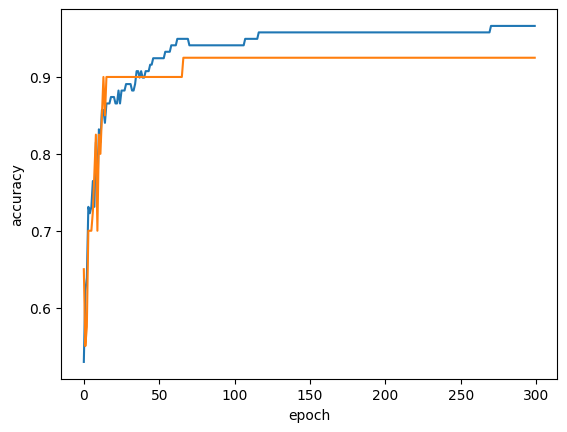

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

데이터가 작기 때문에 아주 잘 드러나지는 않지만, 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다.   
또 확실히 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮다.   
이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보인다.   
   
그럼 SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련해 본다.   
그리고 최종적으로 훈련 세트와 테스트 세트에서 점수를 출력한다.

In [18]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.   
tol 매개변수에서 향상될 최솟값을 지정한다.   
앞의 코드에서는 tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 하였다.   
   
최종 점수가 좋은 편이다.   
훈련 세트와 테스트 세트에서의 정확도 점수가 비교적 높게 나왔다.